### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [2]:
#import pandas library
import pandas as pd
#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

df_true['Label'] = 'Real'
df_fake['Label'] = 'Fake'
df = pd.concat([df_fake,df_true],axis=0)

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head()


(44898, 5)


,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [3]:
#check the distribution of labels 
df['Label'].value_counts()

Label
Fake    23481
Real    21417
Name: count, dtype: int64

In [4]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['Label_num'] = df['Label'].map({
    'Real':0,
    'Fake':1
    
})

#check the results with top 5 rows
df.head(5)


,title,text,subject,date,Label,Label_num
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,1


### **Modelling without Pre-processing Text data**

In [5]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(df.text,df.Label_num,test_size=0.2,random_state=2022, stratify= df.Label_num)


In [6]:
#print the shapes of X_train and X_test
print(X_train.shape)
print(X_test.shape)


(35918,)
(8980,)


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('KNN',KNeighborsClassifier(n_neighbors=10,metric='euclidean'))
    
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_knn_euclidean = clf.predict(X_test)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test,y_pred_knn_euclidean))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4284
           1       0.75      0.72      0.74      4696

    accuracy                           0.73      8980
   macro avg       0.73      0.73      0.73      8980
weighted avg       0.73      0.73      0.73      8980



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('KNN',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
    
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_knn_cosine = clf.predict(X_test)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test,y_pred_knn_cosine))

              precision    recall  f1-score   support

           0       0.93      0.46      0.61      4284
           1       0.66      0.97      0.79      4696

    accuracy                           0.73      8980
   macro avg       0.80      0.71      0.70      8980
weighted avg       0.79      0.73      0.70      8980




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('RF classifier',RandomForestClassifier(n_estimators=30))
    
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_rf = clf.predict(X_test)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4284
           1       0.97      0.96      0.97      4696

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('NB classifier',MultinomialNB(alpha = 0.75))
    
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_nb_75 = clf.predict(X_test)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test,y_pred_nb_75))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4284
           1       0.99      0.98      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [11]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [12]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_txt'] = df['text'].apply(preprocess)


In [13]:
#print the top 5 rows
df.head()

,title,text,subject,date,Label,Label_num,preprocessed_txt
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,1,Donald Trump couldn t wish Americans Happy New...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,1,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,1,Friday reveal Milwaukee Sheriff David Clarke c...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,1,Christmas day Donald Trump announce work f...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,1,Pope Francis annual Christmas Day message rebu...


**Build a model with pre processed text**

In [14]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting

X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_txt,df.Label_num,test_size=0.2,random_state=2022, stratify= df.Label_num)



**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [15]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('RF classifier',RandomForestClassifier(n_estimators=30))
    
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_prf_tri = clf.predict(X_test)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test,y_pred_prf_tri))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4284
           1       0.93      0.97      0.95      4696

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, Bigram, and trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [16]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('RF classifier',RandomForestClassifier(n_estimators=30))
    
])



#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred_prf_uni_bi_tri = clf.predict(X_test)

from sklearn.metrics import classification_report
#4. print the classfication report
print(classification_report(y_test,y_pred_prf_uni_bi_tri))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4284
           1       0.98      0.98      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [24]:
#finally print the confusion matrix for the best model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb_75)
cm


array([[4230,   54],
       [  98, 4598]])

Text(95.72222222222221, 0.5, 'Truth')

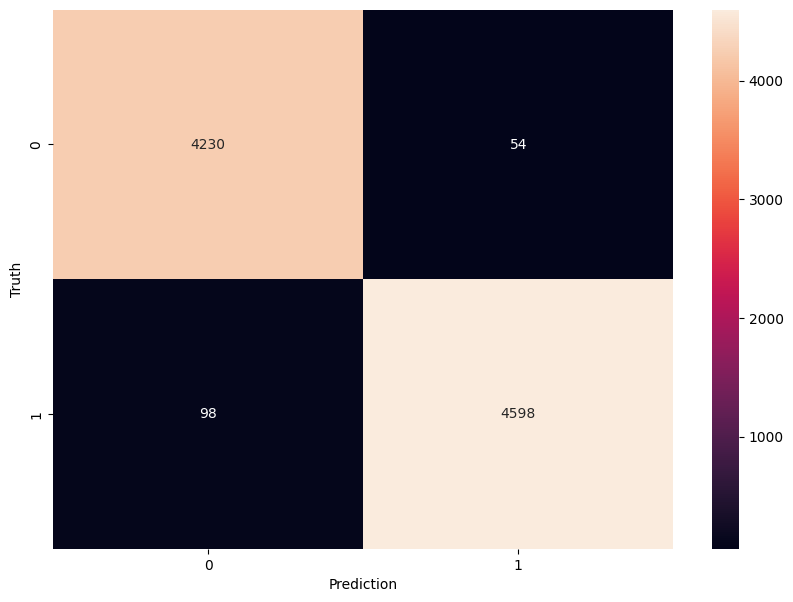

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## **Please write down Final Observations**


**n-grams** : as **n** increases, sparsity increases and the model can overfit the training Data.

**Without Preproccessing** : The Best Model is  Multinomial Naive Bayes as the classifier with an alpha value of 0.75.

**With Preprocessing** : The Best Model is RandomForest as the classifier
